# Result

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

%matplotlib inline

In [2]:
from methods.evaluation import Evaluation

In [3]:
# Domain to use
DOMAIN = 'eclipse'
# Dataset paths
DIR = 'data/processed/{}'.format(DOMAIN)

In [15]:
recall = []
df = pd.DataFrame(columns=['method', 'acc', 'recall@k'])
methods, recall_index = [], []
for method in ['baseline', 'doc2vec', 'fasttext']:
    evaluation = Evaluation(0)
    path = os.path.join(DIR, 'exported_rank_{}.txt'.format(method))
    print(path)
    report = evaluation.evaluate(path)
    recall.append(report['1 - recall_at_5'])
    recall.append(report['2 - recall_at_10'])
    recall.append(report['3 - recall_at_15'])
    recall.append(report['4 - recall_at_20'])
    recall.append(report['5 - recall_at_25'])
    methods += [method] * 5
    recall_index += [5, 10, 15, 20, 25]

df['acc'] = recall
df['recall@k'] = recall_index

df['method'] = methods

data/processed/eclipse/exported_rank_baseline.txt
data/processed/eclipse/exported_rank_doc2vec.txt
data/processed/eclipse/exported_rank_fasttext.txt


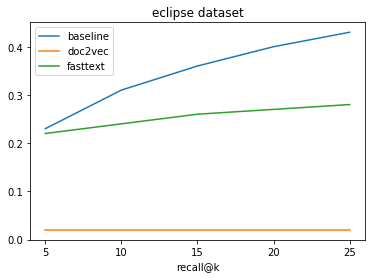

In [16]:
import matplotlib.ticker as mticker

methods = df['method'].unique()
ax = None
for method in methods:
    if ax:
        ax = df[df['method'] == method].plot(x='recall@k', y='acc', label=method, ax=ax)
    else:
        ax = df[df['method'] == method].plot(x='recall@k', y='acc', label=method)
if ax:
    ax.set_title('{} dataset'.format(DOMAIN))
    formatter = mticker.ScalarFormatter()
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_locator(mticker.FixedLocator([5, 10, 15, 20, 25]))
ax = None